<a href="https://colab.research.google.com/github/Tahimi/FiniteDiferenceMethod/blob/main/diffusion1D_FiniteDiference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
# space discretization
xL = 0.
xR = 50.
dx = 0.5
delX = xR - xL
nx = int(delX/dx) #100
x = np.linspace(xL, xR, nx+1) # [x0, x1, ..., x100]

In [3]:
# time discretization
Fr = 0.5 # Fourier Number: Fr = D*dt/dx**2
D = 10.
dt = Fr*dx**2/D
delT = 5.
stepsNbr = int(delT/dt)

In [4]:
# defining the unkown's distribution
def distributionIn1D(x, yMin, yMax, xc, width, isRectangular = True):
  if isRectangular:
    # rectangular distribuition
    return np.array([yMax if xc-width < xi and xi < xc+width else yMin for xi in x])
  else:
    # Gaussian distribuition
    return yMin + yMax * np.exp(-(x - xc) ** 2 / (2 * width ** 2))

In [5]:
def initialize():
    # unkown's initialization
    global yMin, yMax, yInit, y
    yMin = 0.
    yMax = 1.
    xc = 25.
    width = 2.
    yInit = distributionIn1D(x=x,
                             yMin=yMin,
                             yMax=yMax,
                             xc=xc,
                             width=width,
                             isRectangular=False)
    y = np.copy(yInit)

In [6]:
# defining the time-step update function for the
# ExplicitFirstOrderDiffusionFiniteDiferenceScheme
# ForwardFirstOrderAccurateInTime
# centredSecondOrderAccurateInSpace
def diffuse1(yIN, Fr):
  yOUT = np.zeros_like(yIN)
  # internal points
  for i in range(1,len(x)-1):
    yOUT[i] = Fr*yIN[i-1] + (1.-2*Fr)*yIN[i] + Fr*yIN[i+1]
  # closed BC (Neumann), no leaving material, i.e. grad(y) = 0
  yOUT[0] = (1.-2*Fr)*yIN[0] + 2.*Fr*yIN[1]
  yOUT[-1] = 2.*Fr*yIN[-2] + (1.-2*Fr)*yIN[-1]
  return yOUT

In [7]:
# displaying the parameters
print('dx = ', dx, '\n'
      'delX = ', delX, '\n'
      'nx = ', nx, '\n'
      'Fr = ', Fr, '\n'
      'D = ', D, '\n'
      'dt = ', dt, '\n'
      'delT = ', delT, '\n'
      'stepsNbr = ', stepsNbr)

dx =  0.5 
delX =  50.0 
nx =  100 
Fr =  0.5 
D =  10.0 
dt =  0.0125 
delT =  5.0 
stepsNbr =  400


In [8]:
# initialize and iterate in time
initialize()
for step in range(stepsNbr):
  y = diffuse1(y, Fr)

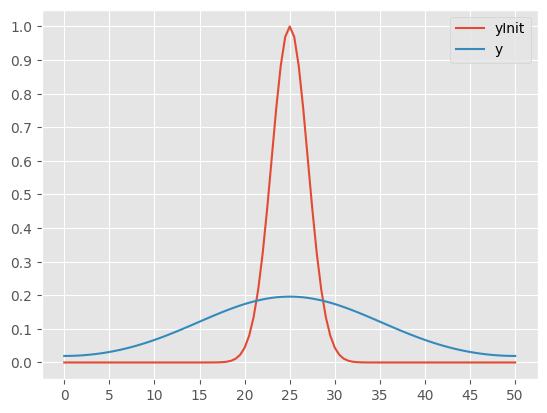

In [9]:
#ploting the simulation results
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.xticks(np.arange(xL, xR+.1, 5))
plt.yticks(np.arange(yMin, yMax+.1, .1))
plt.plot(x, yInit, label='yInit')
plt.plot(x, y, label='y')
plt.legend()
plt.show()